In [4]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")

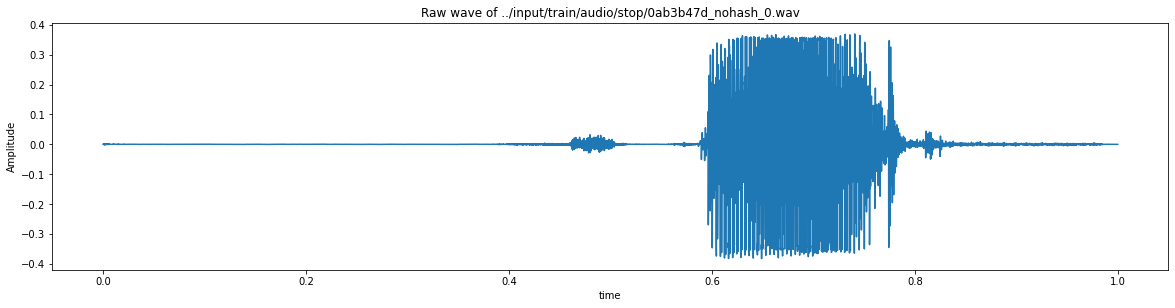

In [5]:
train_audio_path = '/Users/assemali/Desktop/Speech Recognition/tensorflow-speech-recognition/train/audio/'
samples, sample_rate = librosa.load(train_audio_path+'stop/0ab3b47d_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/stop/0ab3b47d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0,sample_rate/len(samples), sample_rate), samples)

In [6]:
ipd.Audio(samples, rate=sample_rate)

In [7]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

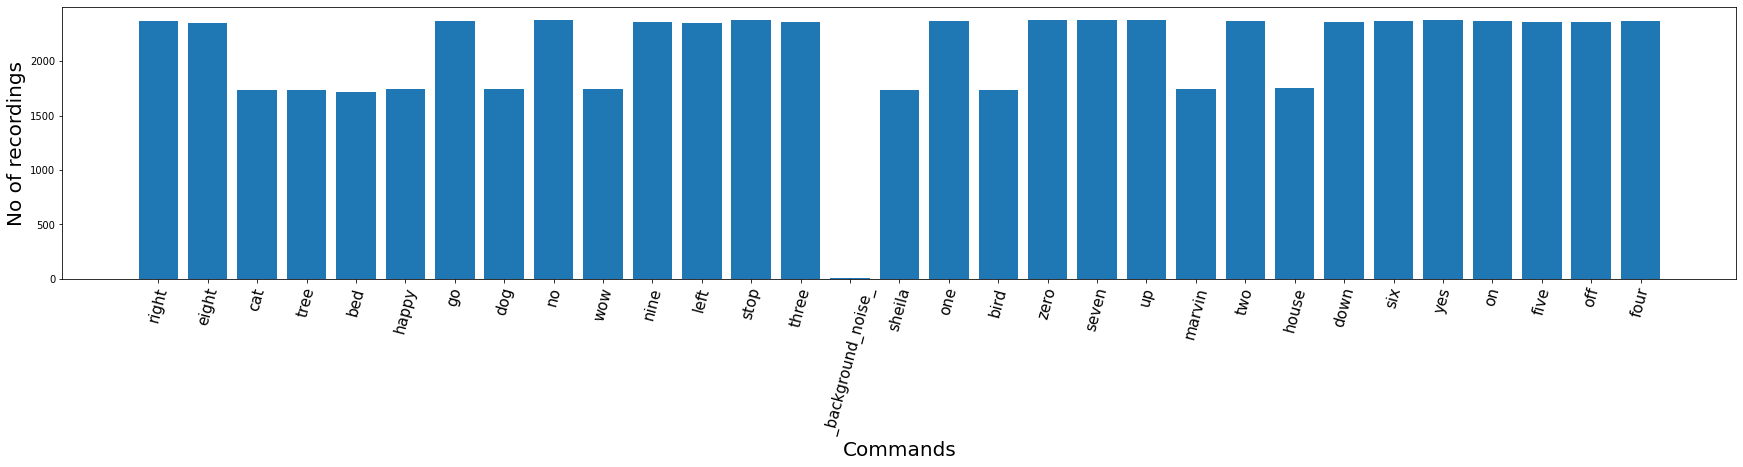

In [8]:
labels = os.listdir(train_audio_path)
labels.remove('.DS_Store')

no_of_recordings = []
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=20)
plt.ylabel('No of recordings', fontsize=20)
plt.xticks(index, labels, fontsize=15, rotation=75)
plt.show()

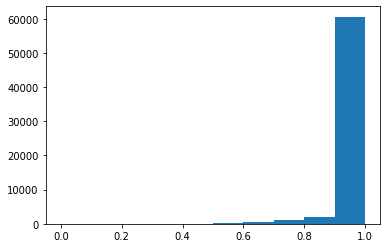

In [9]:
duration_of_recordings = []
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/' + label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))

plt.hist(np.array(duration_of_recordings),range=[0,1]);

In [10]:
train_audio_path = '/Users/assemali/Desktop/Speech Recognition/tensorflow-speech-recognition/train/audio/'

all_waves = []
all_labels = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/' + label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if len(samples) == 8000:
            all_waves.append(samples)
            all_labels.append(label)


right
eight
cat
tree
bed
happy
go
dog
no
wow
nine
left
stop
three
_background_noise_
sheila
one
bird
zero
seven
up
marvin
two
house
down
six
yes
on
five
off
four


In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(all_labels)
classes = list(le.classes_)

NameError: name 'all_labels' is not defined

In [ ]:
from keras.utils import np_utils
y = np_utils.to_categorical(y, num_classes = len(labels))

In [ ]:
all_waves = np.array(all_waves).reshape(-1,8000,1)